In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import joblib
import csv
import matplotlib.pyplot as plt

In [35]:
# Loading the dataframe
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=['target', 'id', 'date', 'flag', 'user', 'text'])

In [36]:
# Map target values to sentiment labels (-1, 0, 1)
df['sentiment'] = df['target'].apply(lambda x: -1 if x == 0 else (1 if x == 4 else 0))

# Randomly discard 90% of the dataset
df = df.sample(frac=0.10, random_state=42)

# Split dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Remove unnecessary columns
train_texts = train_df['text'].values
train_sentiments = train_df['sentiment'].values
test_texts = test_df['text'].values
test_sentiments = test_df['sentiment'].values

In [37]:
# Initialize NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

train_texts = [preprocess_text(text) for text in train_texts]
test_texts = [preprocess_text(text) for text in test_texts]

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
train_features = vectorizer.fit_transform(train_texts)
test_features = vectorizer.transform(test_texts)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
# Train a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(train_features, train_sentiments)

# Predict sentiment on the test set
predictions = svm_model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_sentiments, predictions)
classification_rep = classification_report(test_sentiments, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{classification_rep}')

In [ ]:
# Save the trained SVM model to a specific path
svm_model_path = "./svm_model.pkl"
joblib.dump(svm_model, svm_model_path)

# Save the TF-IDF vectorizer to a specific path
vectorizer_path = "./tfidf_vectorizer.pkl"
joblib.dump(vectorizer, vectorizer_path)


['./tfidf_vectorizer.pkl']

In [ ]:
# Function to load the news headlines
def load_news_headlines(csv_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_path)

    headlines = df['headline_text'].tolist()

    return headlines

In [ ]:
# Load the trained SVM model
svm_model = joblib.load('svm_model.pkl')

# Load the TF-IDF vectorizer
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Load dataset
csv_path = './abcnews-date-text.csv'
news_headlines = load_news_headlines(csv_path)

# Preprocess the news headlines
preprocessed_headlines = [preprocess_text(headline) for headline in news_headlines]

# Convert preprocessed headlines to TF-IDF features
headline_features = vectorizer.transform(preprocessed_headlines)

# Predict the sentiment polarity using the SVM model
headline_polarity = svm_model.predict(headline_features)

In [ ]:
# Populate headline_dates list
headline_dates = []

# Convert headline from numpy array to list
headline_polarity = list(headline_polarity)

# Reads headlines from csv file 
with open("abcnews-date-text.csv", 'r') as file:
    csvreader = csv.reader(file)

    # Reads headline and determines polarity 
    for row in csvreader:
        # Append date to headline_dates
        headline_dates.append(row[0])

In [ ]:
# Removes first element of each list
headline_dates.pop(0)

# Creates a dataframe using pandas
data = {'dates': headline_dates, 'polarity': headline_polarity}
df = pd.DataFrame(data=data)

# Converts dataframe to csv file
df.to_csv('original_polarity.csv')

In [ ]:
# Create empty lists to store data for each year
dates_by_year = [[] for i in range(2003, 2022)]
polarity_by_year = [[] for i in range(2003, 2022)]

# Loop through the lists and group them by year
for date, polarity in zip(headline_dates, headline_polarity):
    year = int(date[:4])  # Extract the year from the date string
    index = year - 2003  # Calculate the index to store the data in the correct sublist
    dates_by_year[index].append(date)
    polarity_by_year[index].append(polarity)

In [ ]:
# Creates a dataframe using pandas
data = {'years': dates_by_year, 'polarity': polarity_by_year}
df = pd.DataFrame(data=data)

# Converts dataframe to csv file
df.to_csv('original_polarity_by_year.csv')

In [ ]:
# Initialize year and avg polarity lists
years = ["2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
average_polarity = []

# Python function to get average of a list
def averageList(list):
    return sum(list) / len(list)

# Finds the average of each year and appends to array
for i in range(len(polarity_by_year)):
    average_polarity.append(averageList(polarity_by_year[i]))

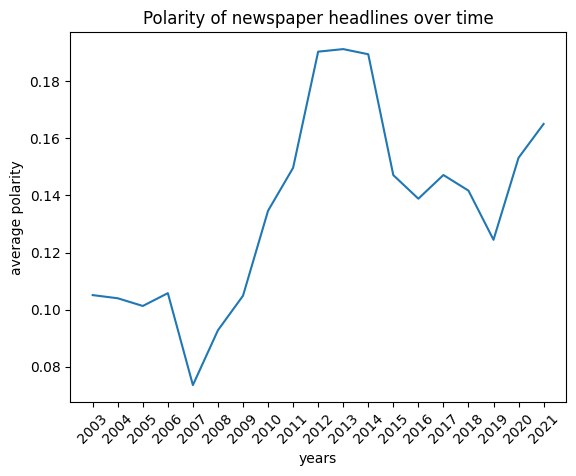

In [ ]:
# plotting the points 
plt.plot(years, average_polarity)
  
# naming the x axis
plt.xlabel('years')
# naming the y axis
plt.ylabel('average polarity')
  
# giving a title to my graph
plt.title('Polarity of newspaper headlines over time')

# rotate x axis labels
plt.xticks(rotation = 45)
  
# function to show the plot
plt.show()